First, load the data,in this notebook we are using the Moss data:



In [1]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import RunML_continue
import FS
import metric

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle
import matplotlib.pyplot as plt

### 1. Load the data and data preprocess
After reading the data, convert the abundance matrix into relative abundance matrix; 

In [3]:
df=pd.read_csv('../data/relative_abundance_df.csv',index_col = 0)
df

,Beijerinckiaceae,Mycobacteriaceae,Ktedonobacteraceae,Bryum argenteum var. argenteum,Burkholderiaceae,Micromonosporaceae,Opitutaceae,WD2101 soil group,Xanthobacteraceae,Chitinophagaceae,...,Marinifilaceae,Aerococcaceae,Acetobacterales Incertae Sedis,Bacteroidaceae,Hydrogenophilaceae,Arachis hypogaea var. vulgaris,Demequinaceae,Pseudohongiellaceae,Bacteroidetes vadinHA17,Thermoanaerobacteraceae
Sp1,57.894737,31.578947,10.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp2,1.448965,0.631692,0.039258,10.413990,6.381156,4.043540,4.025696,3.540328,3.404711,3.222698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp4,1.247068,0.856460,0.017705,0.000000,4.564467,1.226043,1.406409,3.713540,6.305050,6.754304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp5,0.524455,1.700505,0.190711,0.131114,8.470738,2.789145,3.198379,5.602130,3.929437,3.579801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp6,5.468805,80.751917,0.000000,0.000000,5.992825,0.000000,0.014068,0.000000,0.274319,0.235633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp7,2.525957,1.713743,0.005582,0.018142,4.873283,0.117227,1.646757,6.127889,2.756224,1.773752,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp8,2.184587,1.202563,1.198402,0.000000,17.023136,0.000000,0.890479,4.277630,5.629993,3.649301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp9,1.280438,0.458262,0.705364,0.000000,10.149160,4.834217,2.920298,4.506245,3.149429,3.037110,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp10,7.142857,7.142857,4.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.844156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# target variable
y_data = pd.read_excel('../data/rawdata/Moss-classification.xlsx') 
print(y_data)
y = y_data.iloc[:,2].values
print(y)
print(pd.Series(y).value_counts())

      NO.                           Moss name classification(30)  Week 4  \
0    sp.1             Brachythecium Rutabulum               Good      33   
1    sp.2                  Platygyrium Repens                Bad       0   
2    sp.3            Bryoandersonia illecebra               Good      10   
3    sp.4                Aulacomnium Palustre                Bad       0   
4    sp.5                   Entodon seductrix               Good       0   
5    sp.6                    Hedwigia ciliata                Bad       0   
6    sp.7                  Leucobryum glaucum                Bad       0   
7    sp.8                   Sphagnum palustre                Bad       0   
8    sp.9                      Bryum argentum                Bad       0   
9   sp.10                Ceretodon purpureous                Bad       0   
10  sp.11                 Atrichum angustatum               Good      55   
11  sp.12                 Anomodon attenuates               Good       9   
12  sp.13   

In [5]:
ASVs = df.columns
ASVs

Index(['Beijerinckiaceae', 'Mycobacteriaceae', 'Ktedonobacteraceae',
       'Bryum argenteum var. argenteum', 'Burkholderiaceae',
       'Micromonosporaceae', 'Opitutaceae', 'WD2101 soil group',
       'Xanthobacteraceae', 'Chitinophagaceae',
       ...
       'Marinifilaceae', 'Aerococcaceae', 'Acetobacterales Incertae Sedis',
       'Bacteroidaceae', 'Hydrogenophilaceae',
       'Arachis hypogaea var. vulgaris', 'Demequinaceae',
       'Pseudohongiellaceae', 'Bacteroidetes vadinHA17',
       'Thermoanaerobacteraceae'],
      dtype='object', length=328)

### 2. Kruskal-Wallis H-test
The default p value of the function is 10%, the resulted index is ranked by its H statistics descendingly.

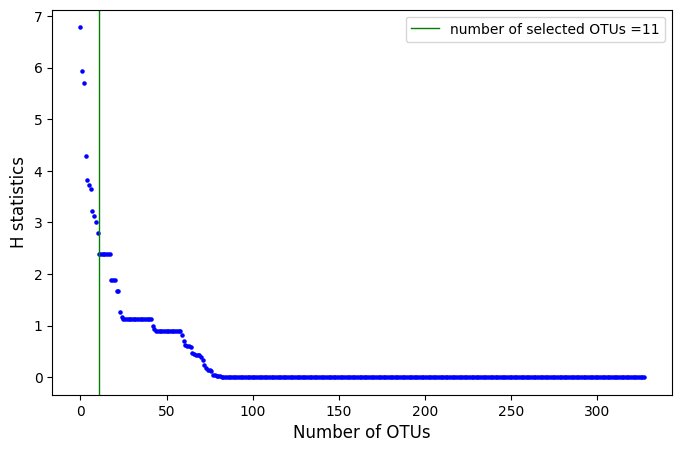

In [6]:
select_result = FS.SelectMicro_fun(df,y)

In [7]:
select_result.keys()
# abundance matrix--> relative abundance matrix (relative by sample, and delete that below 1%)


dict_keys(['selected_data', 'selected_columnames', 'selected_indices', 'relative_abundance_data', 'H_score'])

In [8]:
data=select_result['relative_abundance_data']
weights=select_result['H_score']#  H score for each OTU, the function will: 1. filter those below threshold (1%) to 0; 2. rank the data; calculate the H statistics
selectedOTU_index = select_result['selected_indices']
ASVs_selected= select_result['selected_columnames']
X_FS = select_result['selected_data']# the subset based on the method.

In [9]:
data
print(np.shape(data))

(17, 328)


In [10]:
eps = len(selectedOTU_index)
print(eps)

11


In [11]:
print(ASVs_selected)

Index(['Acetobacteraceae', 'Solibacteraceae (Subgroup 3)', 'Pedosphaeraceae',
       'Acidobacteriaceae (Subgroup 1)', 'Clostridiaceae 1', 'Isosphaeraceae',
       'Pseudomonadaceae', 'Gemmataceae', 'WD2101 soil group',
       'Acidothermaceae', 'Xanthomonadaceae'],
      dtype='object')


In [12]:
# check the selected data (after normalization)
df_FS = pd.DataFrame(X_FS, columns=ASVs_selected)
df_FS['Y'] =y
print(df_FS.iloc[:,8:12].sort_values(by='Y'))

    WD2101 soil group  Acidothermaceae  Xanthomonadaceae     Y
8            0.045062         0.000000          0.000000   Bad
1            0.035403         0.000000          0.000000   Bad
14           0.078300         0.074772          0.000000   Bad
3            0.037135         0.000000          0.000000   Bad
5            0.000000         0.000000          0.000000   Bad
6            0.061279         0.041783          0.000000   Bad
7            0.042776         0.000000          0.000000   Bad
12           0.023312         0.022712          0.021866   Bad
9            0.000000         0.000000          0.000000   Bad
13           0.010623         0.000000          0.090786  Good
11           0.028007         0.000000          0.000000  Good
0            0.000000         0.000000          0.000000  Good
15           0.000000         0.000000          0.039286  Good
4            0.056021         0.000000          0.013151  Good
2            0.000000         0.000000          0.00000

### Model
Prepare 4 datasets: full dataset, our selected dataset, Lasso selected  dataset(based on the target variable), randomly selected data (selected the same numer of variables as in our method)

Use random forest, SVM, CatBoost and NB as classifier, and will build both models for each response variable.

For random selection, the  process will repeat iter=30 times to  find the mean accuracy and AUC


In [13]:
iter =30
cls = ["RF","SVM", "CatBoost","NB"]

In [14]:
targetLabel=y

In [15]:
X_lasso,xlabel_lasso = RunML_continue.LassoFeatureSelection(data,targetLabel)
print(xlabel_lasso)

[  0  14  25  32  58  62  76 108 148 153 168]


In [16]:
X_lasso_ft,xlabel_lasso_ft  = RunML_continue.LassoFS_CV(data,targetLabel)
print(xlabel_lasso_ft)

Best alpha: 0.1
[  0  14  25  32  56  58  76 108 113 153 168]


In [17]:
data_subset = {"AllFeatures":data, 
               "SelectMicro": X_FS,
               "Lasso":X_lasso,
               "Lasso_finetune":X_lasso_ft,
               #"Random":data # CatBoost does not work
              }

In [18]:
print(np.shape(data))
print(np.shape(X_FS))
print(np.shape(X_lasso))
print(np.shape(X_lasso_ft))

(17, 328)
(17, 11)
(17, 11)
(17, 11)


The  function will print out the accuracy and AUC for each dataset using each classifier, and also will return the y_actual, y_predict, y_predprob for future use.

In [19]:
dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,N=iter,classifiers=cls,SMOTE=False)
print(metric.metric_sum(dict_cm))

Key: mean_accuracy, Type: <class 'numpy.float64'>
Key: mean_auc, Type: <class 'numpy.float64'>
Key: y_true, Type: <class 'list'>
Key: y_pred, Type: <class 'list'>
Key: y_pred_prob, Type: <class 'list'>
Key: mean_accuracy, Type: <class 'numpy.float64'>
Key: mean_auc, Type: <class 'numpy.float64'>
Key: y_true, Type: <class 'list'>
Key: y_pred, Type: <class 'list'>
Key: y_pred_prob, Type: <class 'list'>


TBB Warning: The number of workers is currently limited to 0. The request for 47 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



Key: mean_accuracy, Type: <class 'numpy.float64'>
Key: mean_auc, Type: <class 'numpy.float64'>
Key: y_true, Type: <class 'list'>
Key: y_pred, Type: <class 'list'>
Key: y_pred_prob, Type: <class 'list'>
Key: mean_accuracy, Type: <class 'numpy.float64'>
Key: mean_auc, Type: <class 'numpy.float64'>
Key: y_true, Type: <class 'list'>
Key: y_pred, Type: <class 'list'>
Key: y_pred_prob, Type: <class 'list'>
Key: mean_accuracy, Type: <class 'numpy.float64'>
Key: mean_auc, Type: <class 'numpy.float64'>
Key: y_true, Type: <class 'list'>
Key: y_pred, Type: <class 'list'>
Key: y_pred_prob, Type: <class 'list'>
Key: mean_accuracy, Type: <class 'numpy.float64'>
Key: mean_auc, Type: <class 'numpy.float64'>
Key: y_true, Type: <class 'list'>
Key: y_pred, Type: <class 'list'>
Key: y_pred_prob, Type: <class 'list'>
Key: mean_accuracy, Type: <class 'numpy.float64'>
Key: mean_auc, Type: <class 'numpy.float64'>
Key: y_true, Type: <class 'list'>
Key: y_pred, Type: <class 'list'>
Key: y_pred_prob, Type: <clas

### compare the first 15 index by their present ratio

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                               OTU  presence_pos  presence_neg
0                 Acetobacteraceae         0.125      0.777778
1     Solibacteraceae (Subgroup 3)         0.250      0.777778
2                  Pedosphaeraceae         0.000      0.555556
3   Acidobacteriaceae (Subgroup 1)         0.000      0.444444
4                 Clostridiaceae 1         0.375      0.000000
5                   Isosphaeraceae         0.250      0.777778
6                 Pseudomonadaceae         0.500      0.111111
7                      Gemmataceae         0.375      0.777778
8                WD2101 soil group         0.500      0.777778
9                  Acidothermaceae         0.000      0.333333
10                Xanthomonadaceae         0.500      0.111111


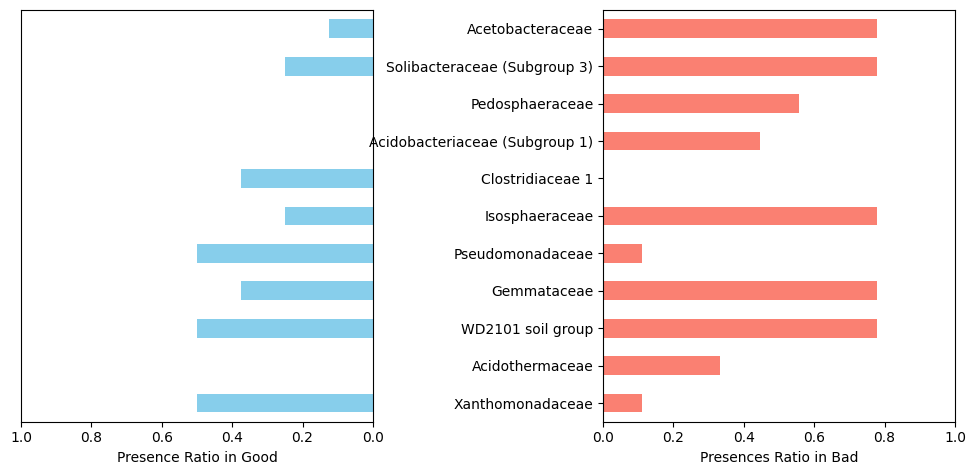

In [20]:
FS.plotPresenseRatio(X_FS,targetLabel,ASVs_selected,posLabel="Good",posText="Good",negText="Bad")

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                             OTU  presence_pos  presence_neg
0               Beijerinckiaceae         0.500      1.000000
1               Acetobacteraceae         0.125      0.777778
2   Solibacteraceae (Subgroup 3)         0.250      0.777778
3             Pseudonocardiaceae         0.250      0.000000
4                Spirochaetaceae         0.500      0.333333
5     Rhizobiales Incertae Sedis         0.250      0.111111
6                        SC-I-84         0.125      0.000000
7               Clostridiaceae 1         0.375      0.000000
8              Dysgonomonadaceae         0.250      0.000000
9                 Rubritaleaceae         0.000      0.111111
10              Cloacimonadaceae         0.000      0.111111


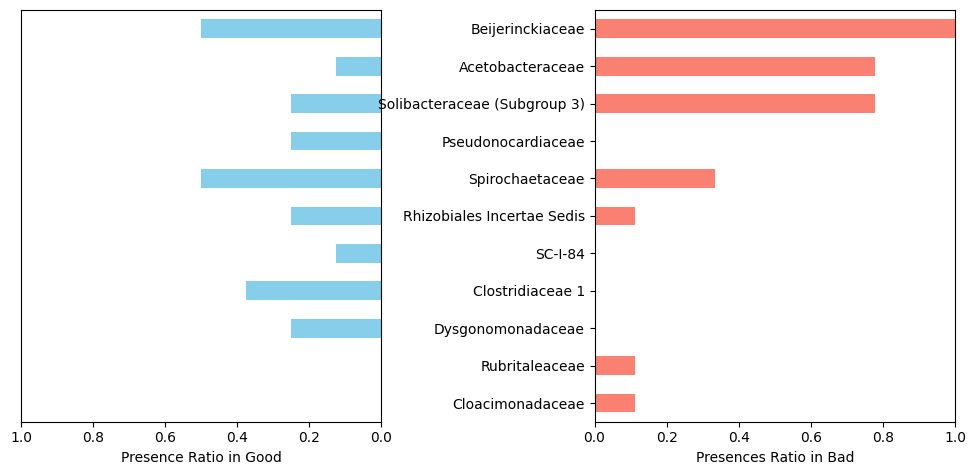

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                             OTU  presence_pos  presence_neg
0               Beijerinckiaceae         0.500      1.000000
1               Acetobacteraceae         0.125      0.777778
2   Solibacteraceae (Subgroup 3)         0.250      0.777778
3             Pseudonocardiaceae         0.250      0.000000
4                   JG30-KF-CM45         0.250      0.000000
5                Spirochaetaceae         0.500      0.333333
6                        SC-I-84         0.125      0.000000
7               Clostridiaceae 1         0.375      0.000000
8               Pseudomonadaceae         0.500      0.111111
9                 Rubritaleaceae         0.000      0.111111
10              Cloacimonadaceae         0.000      0.111111


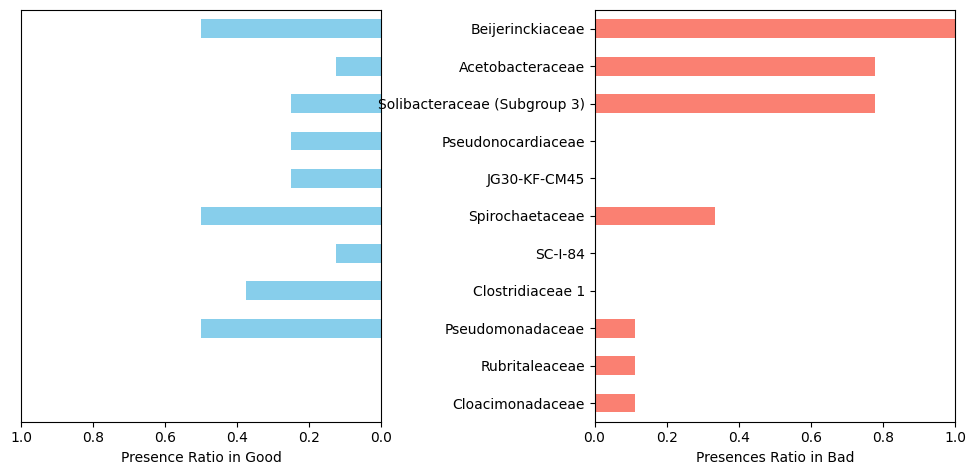

In [21]:
ASVs_selected_lasso= ASVs[xlabel_lasso]
FS.plotPresenseRatio(X_lasso,targetLabel,ASVs_selected_lasso,posLabel="Good",posText="Good",negText="Bad")
ASVs_selected_lasso_ft = ASVs[xlabel_lasso_ft]
FS.plotPresenseRatio(X_lasso_ft,targetLabel,ASVs_selected_lasso_ft,posLabel="Good",posText="Good",negText="Bad")

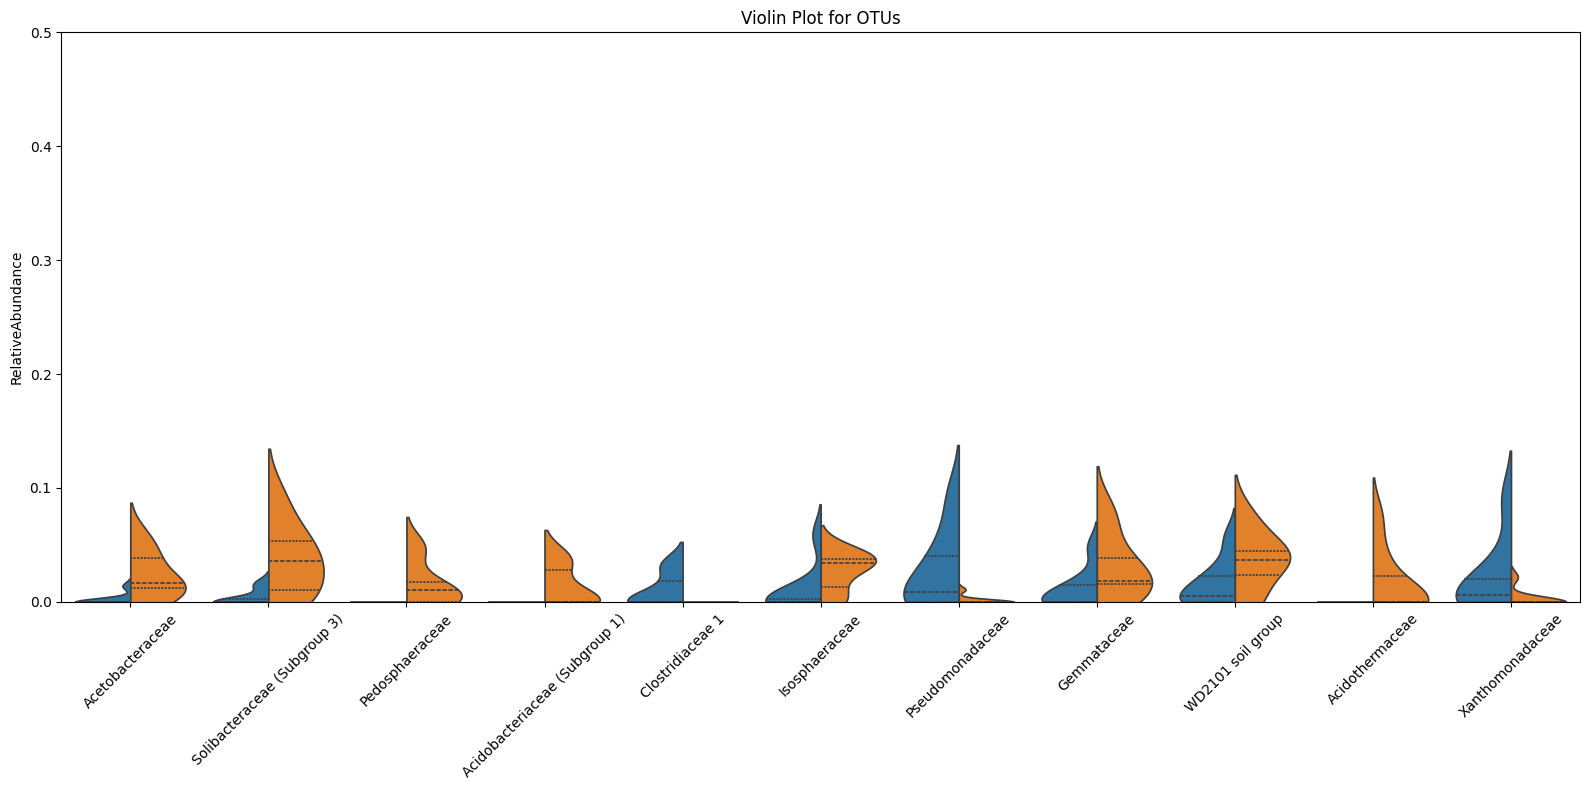

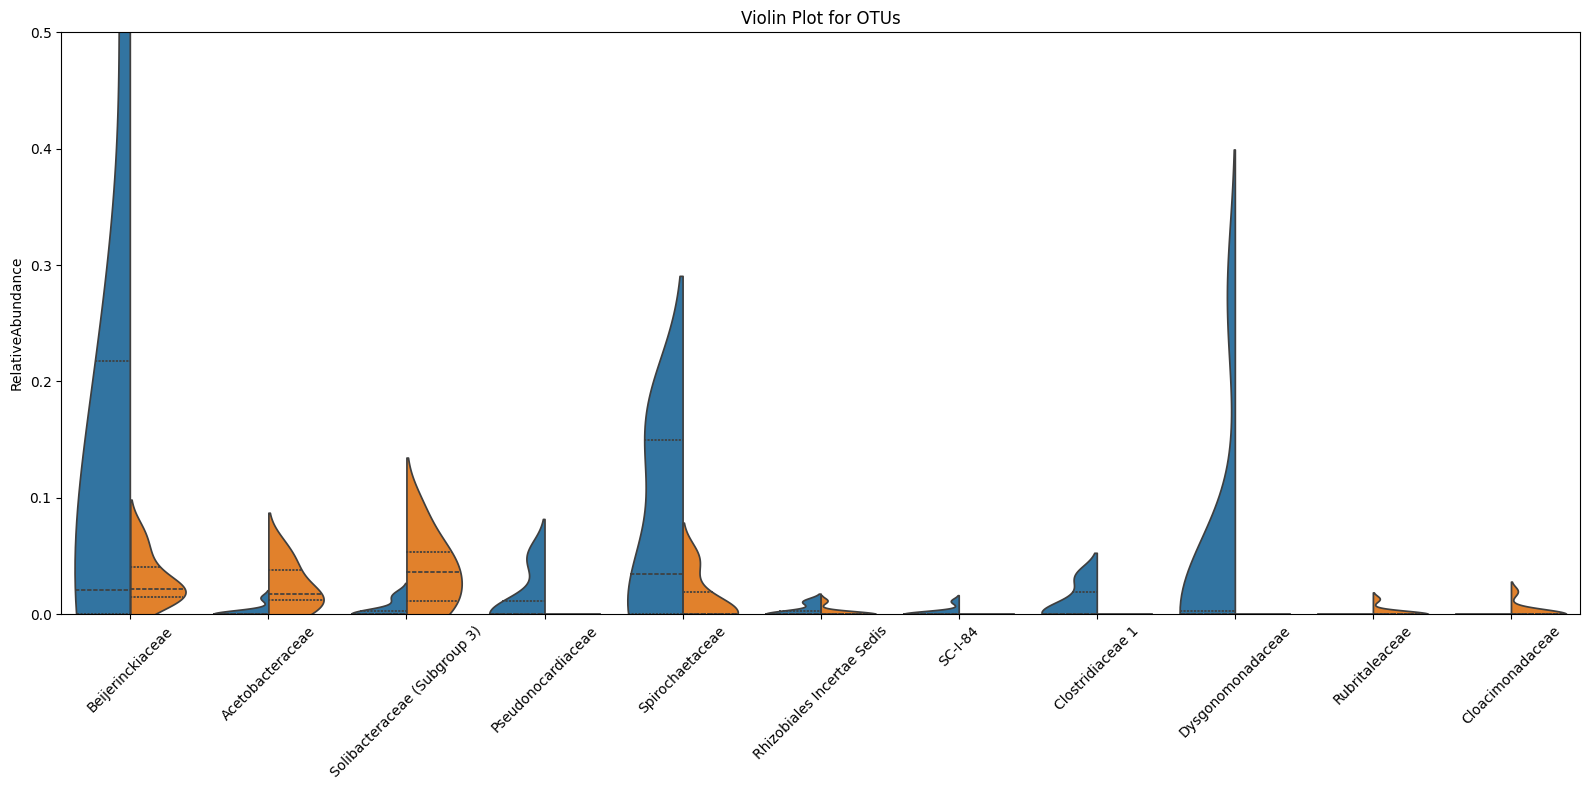

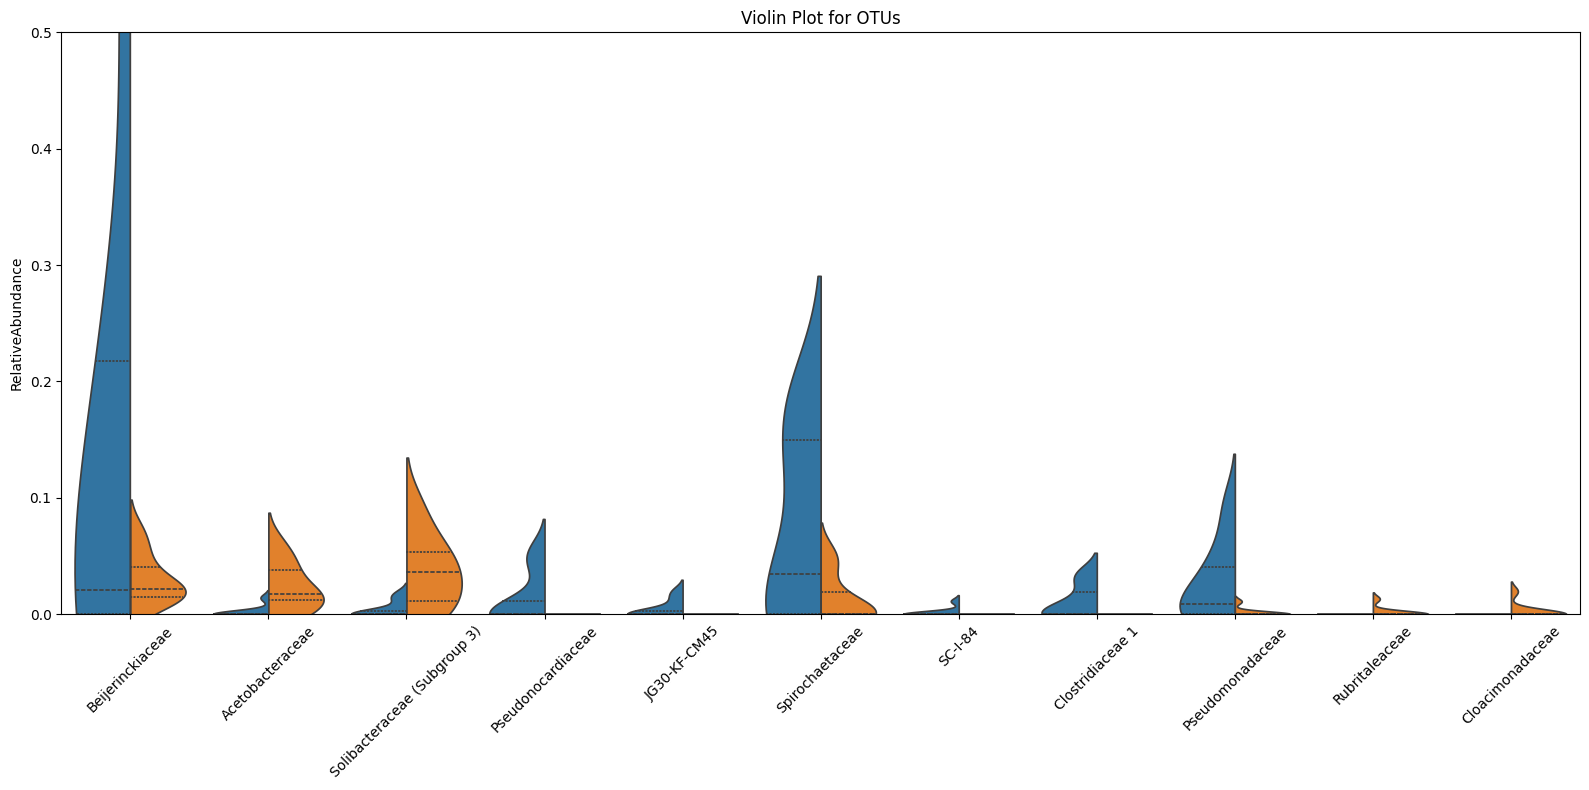

In [22]:
FS.OTUviolin(X_FS,y,ASVs_selected,y_max=0.5)
FS.OTUviolin(X_lasso,y,ASVs_selected_lasso,y_max=0.5)
FS.OTUviolin(X_lasso_ft,y,ASVs_selected_lasso_ft,y_max=0.5)

### Fisher_discriminant_ratio

The Fisher Discriminant Ratio is a measure used in statistics and machine learning to evaluate the separability between two or more classes. It is commonly used in Linear Discriminant Analysis (LDA) to reduce dimensionality while preserving as much of the class discriminatory information as possible.

Fisher's Criterion / Fisher's Discriminant Ratio
Fisher's discriminant ratio evaluates how well the classes can be separated based on the ratio of the between-class scatter matrix to the within-class scatter matrix.

In [23]:
for datatype, subset in data_subset.items():
    print(f"f1 of {datatype} = {metric.fisher_discriminant_ratio(subset,targetLabel)}")
    

f1 of AllFeatures = 0.05225948431766917
f1 of SelectMicro = 0.2895098416197174
f1 of Lasso = 0.16846978915824717
f1 of Lasso_finetune = 0.18582113453590327


In [24]:
# calculate the combined AUC (the samples in each split is very small, which will cause averaged AUC not reliable)
predicted_list = []

    # Iterate over the first level of the dictionary: key1 = datatype, key2 = model
for key1, sub_dict in dict_cm.items():
    # Iterate over the second level of the dictionary
    for key2, value in sub_dict.items():
        predicted_list.append(((f"{key1}_{key2}"), value))



first_values = [item[0] for item in predicted_list]
names = first_values


second_values = [item[1] for item in predicted_list]
print(second_values)
actual_list = []
for i in range(len(second_values)):
    actual = second_values[i][0]
    actual = np.array([1 if label == 'Good' else 0 for label in actual])
    print(actual)
    actual_list.append(actual)

predict_list = []
for i in range(len(second_values)):
    predict = second_values[i][2]
    print(predict)
    predict_list.append(predict)

# List to store metric results
combine_AUClist = []
from sklearn.metrics import roc_auc_score
for i in range(len(second_values)):
    AUC = roc_auc_score(actual_list[i], predict_list[i])
    combine_AUClist.append(result)

[array([['Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good',
        'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
        'Good'],
       ['Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad',
        'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good'],
       ['0.62', '0.68', '0.4', '0.68', '0.42', '0.18', '0.53', '0.49',
        '0.25', '0.32', '0.31', '0.51', '0.35', '0.42', '0.45', '0.28',
        '0.53']], dtype='<U32'), array([['Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good',
        'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
        'Good'],
       ['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad',
        'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good'],
       ['0.46627082819422383', '0.46892076375721087',
        '0.45958708008341087', '0.46658670078240133',
        '0.23140938694592672', '0.7580614998146711',
        '0.22692524687485363', '0.10252100221068357',
        '0.455854904789

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

### feature selection in each fold